<a href="https://colab.research.google.com/github/SupritiVijay/Explainable-Fake-News-Detector/blob/main/XAI_for_fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fake news classifier: 

Dataset Used: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

Hugging Face: https://huggingface.co/SupritiVijay/fake-news-detector 

* Trained a text classification model to detect fake news articles.
* Present suggestions on how we can improve the model's performance on these news articles

## Load Kaggle Dataset:

In [ ]:
!pip install datasets &> /dev/null

### Loading colab drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Copy kaggle.json locally

In [ ]:
!cp ./gdrive/MyDrive/kaggle.json kaggle.json

### Load Kaggle API

In [ ]:
!pip install kaggle &> /dev/null
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Download dataset

In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 39% 16.0M/41.0M [00:00<00:00, 166MB/s]
100% 41.0M/41.0M [00:00<00:00, 233MB/s]


### Unzip downloaded data

1.   Fake.csv
2.   True.csv



In [ ]:
!unzip -o fake-and-real-news-dataset.zip

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## Generate Dataset:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [ ]:
df = pd.concat([true_df, fake_df])
df['label'] = ["True"]*len(true_df) + ["Fake"]*len(fake_df)
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


An conclusion that can be drawn from this is that subject values are not textual in nature, rather they are meant to be nominal in nature. 

Therefore, an appropriate method would be to first convert them into readable values, such as:

In [ ]:
subjects = sorted(list(set([i for i in df.subject])))
subject_representatives = {'Government News': 'Government News', 'Middle-east': 'Middle east', 'News': 'News', 'US_News': 'US_News', 'left-news': 'left-news', 'politics':'politics', 'politicsNews': 'politics News', 'worldnews': 'world news'}
print(subjects, len(subjects))
df.subject = [subject_representatives[i] for i in df.subject]

['Government News', 'Middle-east', 'News', 'US_News', 'left-news', 'politics', 'politicsNews', 'worldnews'] 8


As shown below, we will be combining both text based columns for easier access to textual data. This will help us to further analyse the data.

In [ ]:
df['news'] = [k+'. '+i+' '+j for i,j,k in zip(df.title, df.text, df.subject)]
df = df.drop(columns=['title', 'text', 'date', 'subject'])
df

,label,news
0,True,"politics News. As U.S. budget fight looms, Rep..."
1,True,politics News. U.S. military to accept transge...
2,True,politics News. Senior U.S. Republican senator:...
3,True,politics News. FBI Russia probe helped by Aust...
4,True,politics News. Trump wants Postal Service to c...
...,...,...
23476,Fake,Middle east. McPain: John McCain Furious That ...
23477,Fake,Middle east. JUSTICE? Yahoo Settles E-mail Pri...
23478,Fake,Middle east. Sunnistan: US and Allied ‘Safe Zo...
23479,Fake,Middle east. How to Blow $700 Million: Al Jaze...


Converting labels into binary representation true=0, fake=1

In [ ]:
df.label = [0.0 if l=='True' else 1.0 for l in df.label]
df

,label,news
0,0.0,"politics News. As U.S. budget fight looms, Rep..."
1,0.0,politics News. U.S. military to accept transge...
2,0.0,politics News. Senior U.S. Republican senator:...
3,0.0,politics News. FBI Russia probe helped by Aust...
4,0.0,politics News. Trump wants Postal Service to c...
...,...,...
23476,1.0,Middle east. McPain: John McCain Furious That ...
23477,1.0,Middle east. JUSTICE? Yahoo Settles E-mail Pri...
23478,1.0,Middle east. Sunnistan: US and Allied ‘Safe Zo...
23479,1.0,Middle east. How to Blow $700 Million: Al Jaze...


## Random Shuffle and Split Train & Test

In [ ]:
cols = df.columns
df = df.values
np.random.seed(0)
np.random.shuffle(df)
train_df = df[:int(0.8*df.shape[0])]
test_df = df[int(0.8*df.shape[0]):]
train_df, test_df = pd.DataFrame(train_df), pd.DataFrame(test_df)
train_df.columns = ['label', 'text']
test_df.columns = ['label', 'text']

In [ ]:
train_df

,label,text
0,1.0,politics. RUBIO Sides With Democrats On Giving...
1,1.0,News. Ted Cruz Says Endorsing Trump Is A ‘Gra...
2,1.0,"News. ‘Responsible Gun Owner’ Road Rages, Thr..."
3,1.0,Government News. TEACHER’S UNION PROTEST Gets ...
4,0.0,politics News. Etihad advises checks with U.S....
...,...,...
35913,1.0,politics. OBAMA LIES EXPOSED: New Info Shuts D...
35914,1.0,politics. #BlackLivesMatterTerrorists Shut Dow...
35915,1.0,politics. BUSTED! ONE OF NATION’S BIGGEST POLI...
35916,1.0,left-news. SHERIFF WON’T ENFORCE GUN CONTROL L...


In [ ]:
test_df

,label,text
0,0.0,politics News. Trump's push to fund wall may b...
1,0.0,politics News. U.S. says working to cut off No...
2,1.0,Government News. (VIDEO) BREAKING ENVIRONMENTA...
3,1.0,politics. “THE TRUMP CURSE IS REAL”…Social Med...
4,0.0,world news. Lebanon interior minister says thi...
...,...,...
8975,1.0,News. Paul Krugman: Obama Rolled Back RONALD ...
8976,0.0,world news. Guatemala top court sides with U.N...
8977,1.0,left-news. OOPS! NASA Makes Shocking Claim: Bu...
8978,1.0,US_News. Collapsing: Why the ‘Russia Hack’ Wit...


### Saving CSVs:

In [ ]:
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

### Loading using transformer:

In [ ]:
from datasets import load_dataset

In [ ]:
train_data = load_dataset('csv', data_files="train.csv")
test_data = load_dataset('csv', data_files="test.csv")

Using custom data configuration default-2c8fa17b5999c73f


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-2c8fa17b5999c73f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-361faa4961d7ee53


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-361faa4961d7ee53/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

## Model Choice:

In [ ]:
model_name = "distilbert-base-uncased"
save_model = True

## Setting up hugging face

In [ ]:
!pip install transformers &> /dev/null

In [ ]:
from transformers import AutoTokenizer
from tqdm.notebook import tqdm
import torch

## Tokenizing Text based on Transformer model: 

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
  return tokenizer(examples["text"], padding="max_length", truncation=True)

In [ ]:
tokenized_train_transformed = train_data.map(tokenize_function, batched=True)
tokenized_test_transformed = test_data.map(tokenize_function, batched=True)

  0%|          | 0/36 [00:00<?, ?ba/s]

  0%|          | 0/9 [00:00<?, ?ba/s]

## Setting up Model-for-Inference:

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

## Training Model:

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
training_args = TrainingArguments(output_dir = "./results",
    learning_rate = 5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs = 2,
    weight_decay = 0.01,
    evaluation_strategy="steps",
    )

In [ ]:
from datasets import load_metric

metric = load_metric("accuracy", "f1")

def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.around(logits)
  return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_transformed["train"],
    eval_dataset=tokenized_test_transformed["train"],
    compute_metrics=compute_metrics,
)

## Training progress:

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 35918
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4490


Step,Training Loss,Validation Loss,Accuracy
500,0.009900,0.000050,1.000000


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin


Step,Training Loss,Validation Loss,Accuracy
500,0.009900,0.000050,1.000000
1000,0.001200,0.000037,1.000000
1500,0.001200,0.000062,1.000000
2000,0.000800,0.000358,1.000000
2500,0.000800,0.000024,1.000000
3000,0.000800,0.000057,1.000000
3500,0.000800,0.000040,1.000000
4000,0.000700,0.000127,1.000000


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved i

TrainOutput(global_step=4490, training_loss=0.0018634252134038505, metrics={'train_runtime': 9299.3446, 'train_samples_per_second': 7.725, 'train_steps_per_second': 0.483, 'total_flos': 9515758346784768.0, 'train_loss': 0.0018634252134038505, 'epoch': 2.0})

## Initializing Hugging Face Save Function

In [ ]:
!pip install huggingface_hub &> /dev/null

In [ ]:
!sudo apt-get install git-lfs &> /dev/null
!git lfs install &> /dev/null

In [ ]:
!git config --global credential.helper store

In [ ]:
from huggingface_hub import notebook_login

## Saving to Hugging Face

In [ ]:
if save_model:
  notebook_login()
  model.push_to_hub("fake-news-detector", use_temp_dir=True)

## Generating Area Under The Curve:

In [ ]:
predictions = trainer.predict(tokenized_test_transformed["train"])

The following columns in the test set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 8980
  Batch size = 16


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
labels = np.array(tokenized_test_transformed['train']['label'])

In [ ]:
preds = predictions.predictions.flatten()

In [ ]:
preds[preds>1] = 1
preds[preds<0] = 0

In [ ]:
fpr, tpr, thresholds = roc_curve(labels, preds)

## Area Under the Curve:

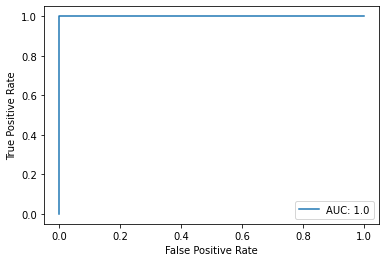

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label="AUC: "+str(round(roc_auc_score(labels, preds), 4)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## Infering Incorrect Predictions:

In [ ]:
predicted = np.around(preds)
incorrect_samples = [index for index in range(predicted.shape[0]) if predicted[index]!=labels[index]]
print(incorrect_samples)

Since most of the test predictions seem to be accurate, we shall analyse the slightly incorrect/unsure samples.

### Sureity Validation:

In [ ]:
sureity_indices = np.argsort(np.abs(preds - np.array(labels)))
print(preds[sureity_indices])
incorrect_samples = sureity_indices[::-1][:100]
print(incorrect_samples)

[0.         0.         0.         ... 0.00112837 0.00134646 0.001855  ]
[ 293 1041 4090 2552 1409 1715 6173 3515 5155 1545 1287 2759 1152 1857
 5259 2441 7798  993 1003 1085 2028 2021  660 2308  196 6107 2947 6774
 5980 7697 4361 4520 6897 2280 1629 7788 6223 1207   40 6337 2790 6710
 2875  238 6836 4630 5976 6799  290 1522 2995 3181 7926 1825 3841 6533
 1634 5593 3829 1053 6535 7520 2161 6159 7523 2008 7191 4063 8141 8853
 6818 5407 4978 1535 7460 3729 8021 3066 6324 7314 6130 4792 6585 8074
 3097 8506 3176 7033 1057 2413 3298 4130 4565 7420 6379 6719 4929 2687
 8913 4747]


In [ ]:
print(tokenized_test_transformed["train"]["text"][incorrect_samples[0]])
print("Predicted Label:", predicted[incorrect_samples[0]])
print("True Label:", labels[incorrect_samples[0]])

politics News. Factbox: Trump on Twitter (April 19) - Georgia elections, Karen Handel The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Dems failed in Kansas and are now failing in Georgia. Great job Karen Handel! It is now Hollywood vs. Georgia on June 20th. [0843 EST] - Despite major outside money, FAKE media support and eleven Republican candidates, BIG “R” win with runoff in Georgia. Glad to be of help! [0009 EST]  -#MAGA #VPinASIA bit.ly/2oMuzv1 [0129 EST] - #BuyAmericanHireAmerican #MAGA [0736 EST]  -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 
Predicted Label: 0.0
True Label: 0.0


In [ ]:
print(tokenized_test_transformed["train"]["text"][incorrect_samples[1]])
print("Predicted Label:", predicted[incorrect_samples[1]])
print("True Label:", labels[incorrect_samples[1]])

politics News. Djokovic hoping Kyrgios can stop squandering his gifts SHANGHAI (Reuters) - World number one Novak Djokovic hopes Nick Kyrgios can learn some “life lessons” after the Australian was fined by the ATP Tour for breaching its code of conduct during a contentious defeat at the Shanghai Masters. The Australian was beaten 6-3 6-1 by Mischa Zverev in a second-round match on Wednesday in which he put in a series of half-hearted serves and appeared to be walking off court before the unseeded German had completed his shot. The 21-year-old, who has had a number of scrapes with tennis authorities over his behavior in the past, also clashed with spectators before being booed off the court and was subsequently fined $16,500 by the ATP for his behavior. Speaking at the same tournament on Thursday, Djokovic described Kyrgios as one of the greatest talents that the game has seen lately, and said he hoped the Australian would stop squandering his gifts. “He’s got huge potential, huge game,

### Interpretability pipeline

In [ ]:
sentences = [tokenized_test_transformed["train"]["text"][incorrect_samples[i]] for i in range(10)]
sentence_labels = [labels[incorrect_samples[i]] for i in range(10)]

In [ ]:
def predict_sentences(sentences):
  model.eval()
  encodes = torch.tensor(tokenizer(sentences, padding="max_length", truncation=True)['input_ids'])
  encodes = encodes.to(device)
  pred = model(encodes)['logits'].detach().cpu().numpy()
  pred[pred<0] = 0.0
  pred[pred>=1] = 1.0
  return pred.flatten()

In [ ]:
print(predict_sentences(sentences))
print(sentence_labels)

[0.         0.00328078 0.00112837 0.00110199 0.00103271 0.00138239
 0.00128382 0.00087156 0.00372372 0.00100699]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
!pip install highlight-text &> /dev/null

In [ ]:
def infer_sentence_ngram(sentence, label, ngram=2, batch_size=16, return_all=False):
  sentence_p = predict_sentences([sentence])[0]
  words = sentence.split()
  tmp_sentences = []
  tmp_word_to_be_replaced = []
  explains = {"words_replaced": [], "preds": []}
  for word_idx in tqdm(range(0, min(512, len(words)))):
    word_to_be_replaced = " ".join(words[word_idx:word_idx+ngram])
    tmp_sentence = sentence.replace(word_to_be_replaced, "")
    tmp_sentences.append(tmp_sentence)
    tmp_word_to_be_replaced.append(word_to_be_replaced)
    if len(tmp_sentences)==batch_size:
      preds = [i for i in predict_sentences(tmp_sentences)]
      single_words, single_preds = [], []
      for idx, word_to_be_replaced in enumerate(tmp_word_to_be_replaced):
        single_words.extend(word_to_be_replaced.split())
        single_preds.extend([preds[idx]]*ngram)
      explains["words_replaced"].extend(single_words)
      explains["preds"].extend(single_preds)
      tmp_word_to_be_replaced = []
      tmp_sentences = []
  explains_summed = {"words_replaced": [], "preds": []}
  explains["preds"] = 2*(((-1)**(1-int(label)))*(np.array(explains["preds"])-sentence_p))
  for word in sorted(list(set(explains["words_replaced"]))):
    tmp = []
    for index in range(len(explains["words_replaced"])):
      if explains["words_replaced"][index]==word:
        tmp.append(explains["preds"][index])
    explains_summed["words_replaced"].append(word)
    explains_summed["preds"].append(sum(tmp)/len(tmp))
  explains_summed["preds"] = np.array(explains_summed["preds"])
  explains_summed["preds"] = explains_summed["preds"]/np.std(explains_summed["preds"])
  try:
    explains_summed["preds"][explains_summed["preds"]>0] = (explains_summed["preds"][explains_summed["preds"]>0] - np.min(explains_summed["preds"][explains_summed["preds"]>0]))/(np.max(explains_summed["preds"][explains_summed["preds"]>0]) - np.min(explains_summed["preds"][explains_summed["preds"]>0]))
  except:
    pass
  try:
    explains_summed["preds"][explains_summed["preds"]<=0] = -1+(explains_summed["preds"][explains_summed["preds"]<=0] - np.min(explains_summed["preds"][explains_summed["preds"]<=0]))/(np.max(explains_summed["preds"][explains_summed["preds"]<=0]) - np.min(explains_summed["preds"][explains_summed["preds"]<=0]))
  except:
    pass
  if return_all:
    return explains_summed, sentence_p
  return explains_summed

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from highlight_text import HighlightText

In [ ]:
def infer_sentence(sentence, label):
  explains_1 = infer_sentence_ngram(sentence, label, ngram=1)
  explains_2 = infer_sentence_ngram(sentence, label, ngram=2)
  explains_3, p = infer_sentence_ngram(sentence, label, ngram=3, return_all=True)
  gram_summation = {"words_replaced": explains_1["words_replaced"], "preds": np.array([int(255*(i+j+k)/3) for i,j,k in zip(explains_1["preds"], explains_2["preds"], explains_3["preds"])])}
  return gram_summation, p

In [ ]:
def get_hex_values(explains):
  hex_values = []
  for value in explains["preds"]:
    value = -1*value
    if value<0:
      hv = hex(-1*value)[2:]
      if len(hv)<2:
        hv = '0'*(2-len(hv))+hv
      hv = "#"+hv+"0000"
    else:
      hv = hex(value)[2:]
      if len(hv)<2:
        hv = '0'*(2-len(hv))+hv
      hv = "#00"+hv+"00"
    hex_values.append(hv)
  return hex_values

In [ ]:
def get_image_highlights(sentence, hex_values):
  new_sentence = ""
  new_color_list = []
  N = 125
  sentence = "\n".join([sentence[index:index+N] for index in range(0, len(sentence), N)])
  for word in sentence.split(' '):
    if word in explains["words_replaced"]:
      new_color_list.append(hex_values[explains["words_replaced"].index(word)])
      new_sentence += "<"+word+"> "
    else:
      new_sentence += word+" "
  new_sentence = new_sentence.strip()
  return new_sentence, new_color_list

## Demonstration - 1

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

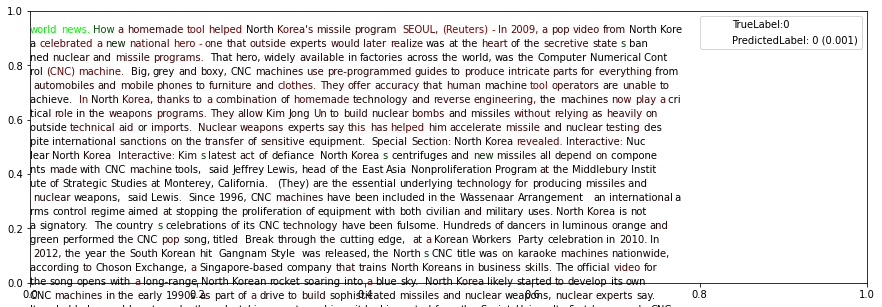

In [ ]:
idx = 2
explains, p = infer_sentence(sentences[idx], sentence_labels[idx])
hex_values = get_hex_values(explains)
new_sentence, new_color_list = get_image_highlights(sentences[idx], hex_values)
plt.clf()
fig, ax = plt.subplots(figsize=(15,5))  
HighlightText(x=0., y=0.95,s=new_sentence,highlight_textprops=[{"color": i} for i in new_color_list],ax=ax)
red_patch = mpatches.Patch(color='white', label='TrueLabel:'+str(int(sentence_labels[idx])))
blue_patch = mpatches.Patch(color='white', label='PredictedLabel: '+str(round(p))+' ('+str(round(p, 3))+')')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

### Inference:

1. The fact that, `US News` seems to be highlighted followed by `politics` below, we can infer that **SUBJECT** seems to be modifying results greatly, therefore a methodology which employs an embedding layer to input subjects would make it more learnable. 

  **Suggestion:** Would be to employ DistlBert to extract embedding_vec over the **title+text**, and **embedding_id-->embedding_vec**, concatenate the two, and a classification layer, which is able to learn using both vectors.



2. An interesting aspect is the impact of sources and organizations, both `CNC, Korea` and `Reuters` seem to be highlighted, which would mean that names seem to be an integral aspect of fake-true news detection. 

  **Suggestion:** Employing **Targetted attention through attention-masking**, would be an interesting aspect of understanding organization inference for classification by the model.

## Demonstration - 2

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

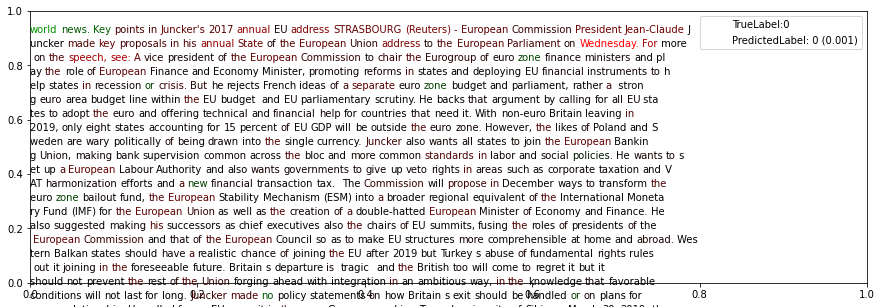

In [ ]:
idx = 3
explains, p = infer_sentence(sentences[idx], sentence_labels[idx])
hex_values = get_hex_values(explains)
new_sentence, new_color_list = get_image_highlights(sentences[idx], hex_values)
plt.clf()
fig, ax = plt.subplots(figsize=(15,5))  
HighlightText(x=0., y=0.95,s=new_sentence,highlight_textprops=[{"color": i} for i in new_color_list],ax=ax)
red_patch = mpatches.Patch(color='white', label='TrueLabel:'+str(int(sentence_labels[idx])))
blue_patch = mpatches.Patch(color='white', label='PredictedLabel: '+str(round(p))+' ('+str(round(p, 3))+')')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

### Inference:

1. Now, here the true label is real news, we can see the model infers locational tags and particular names for potentially labelling it as Fake news. This would be due to a possible political bias within the data-distribution. Therefore, another masking structure may be introduced for **data cleaning**!
2. Removal of proper nouns, and left-right political **bias mitigation**.